This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Fundamentals of machine learning

## Generalization: The goal of machine learning

### Underfitting and overfitting

#### Noisy training data

#### Ambiguous features

#### Rare features and spurious correlations

**Adding white-noise channels or all-zeros channels to MNIST**

In [1]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

**Training the same model on MNIST data with noise channels or all-zero channels**

In [2]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 6s 13ms/step - loss: 0.6262 - accuracy: 0.8112 - val_loss: 0.3102 - val_accuracy: 0.9051
Epoch 2/10
375/375 [==============================] - 4s 12ms/step - loss: 0.2604 - accuracy: 0.9188 - val_loss: 0.1958 - val_accuracy: 0.9435
Epoch 3/10
375/375 [==============================] - 5s 12ms/step - loss: 0.1708 - accuracy: 0.9472 - val_loss: 0.1846 - val_accuracy: 0.9442
Epoch 4/10
375/375 [==============================] - 5s 13ms/step - loss: 0.1221 - accuracy: 0.9617 - val_loss: 0.1391 - val_accuracy: 0.9588
Epoch 5/10
375/375 [==============================] - 5s 12ms/step - loss: 0.0896 - accuracy: 0.9712 - val_loss: 0.1469 - val_accuracy: 0.9573
Epoch 6/10
375/375 [==============================] - 5s 12ms/step - loss: 0.0650 - accuracy: 0.9792 - val_loss: 0.1665 - val_accuracy: 0.9502
Epoch 7/10
375/375 [==============================] - 4s 12ms/step - loss: 0.0482 - accuracy: 0.9845 - val_loss: 0.1156 - val_accuracy: 0.9666

**Plotting a validation accuracy comparison**

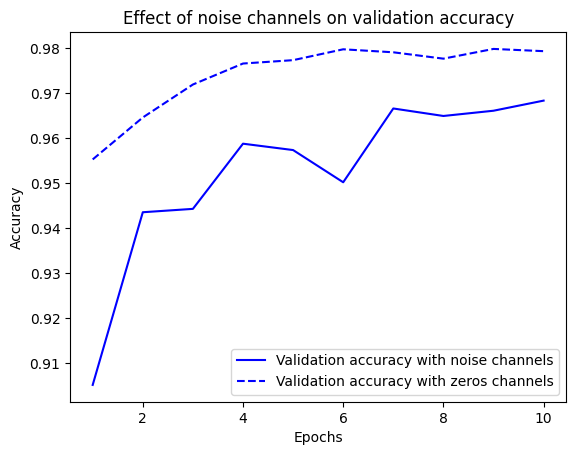

In [3]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

### The nature of generalization in deep learning

**Fitting a MNIST model with randomly shuffled labels**

In [4]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128,
          validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 4s 9ms/step - loss: 2.3164 - accuracy: 0.1037 - val_loss: 2.3064 - val_accuracy: 0.1093
Epoch 2/100
375/375 [==============================] - 3s 8ms/step - loss: 2.3000 - accuracy: 0.1171 - val_loss: 2.3100 - val_accuracy: 0.0998
Epoch 3/100
375/375 [==============================] - 3s 8ms/step - loss: 2.2918 - accuracy: 0.1276 - val_loss: 2.3191 - val_accuracy: 0.1010
Epoch 4/100
375/375 [==============================] - 3s 8ms/step - loss: 2.2796 - accuracy: 0.1397 - val_loss: 2.3220 - val_accuracy: 0.1053
Epoch 5/100
375/375 [==============================] - 3s 8ms/step - loss: 2.2641 - accuracy: 0.1514 - val_loss: 2.3349 - val_accuracy: 0.1043
Epoch 6/100
375/375 [==============================] - 3s 8ms/step - loss: 2.2446 - accuracy: 0.1626 - val_loss: 2.3423 - val_accuracy: 0.1020
Epoch 7/100
375/375 [==============================] - 3s 8ms/step - loss: 2.2220 - accuracy: 0.1807 - val_loss: 2.3687 - val_accuracy: 0.1076

KeyboardInterrupt: 

#### The manifold hypothesis

#### Interpolation as a source of generalization

#### Why deep learning works

#### Training data is paramount

## Evaluating machine-learning models

### Training, validation, and test sets

#### Simple hold-out validation

#### K-fold validation

#### Iterated K-fold validation with shuffling

### Beating a common-sense baseline

### Things to keep in mind about model evaluation

## Improving model fit

### Tuning key gradient descent parameters

**Training a MNIST model with an incorrectly high learning rate**

In [5]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 4s 9ms/step - loss: 489.6585 - accuracy: 0.2986 - val_loss: 2.3497 - val_accuracy: 0.1419
Epoch 2/10
375/375 [==============================] - 3s 9ms/step - loss: 2.9065 - accuracy: 0.1718 - val_loss: 2.2301 - val_accuracy: 0.1891
Epoch 3/10
375/375 [==============================] - 3s 9ms/step - loss: 2.4079 - accuracy: 0.1996 - val_loss: 2.1567 - val_accuracy: 0.1974
Epoch 4/10
375/375 [==============================] - 3s 8ms/step - loss: 2.4810 - accuracy: 0.2001 - val_loss: 2.1965 - val_accuracy: 0.2062
Epoch 5/10
375/375 [==============================] - 3s 8ms/step - loss: 2.4287 - accuracy: 0.2177 - val_loss: 2.2384 - val_accuracy: 0.1861
Epoch 6/10
375/375 [==============================] - 3s 9ms/step - loss: 2.3790 - accuracy: 0.2231 - val_loss: 2.2415 - val_accuracy: 0.2167
Epoch 7/10
375/375 [==============================] - 3s 8ms/step - loss: 2.3233 - accuracy: 0.2244 - val_loss: 2.1277 - val_accuracy: 0.2093
Epoc

**The same model with a more appropriate learning rate**

In [6]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 4s 9ms/step - loss: 0.3182 - accuracy: 0.9154 - val_loss: 0.1302 - val_accuracy: 0.9628
Epoch 2/10
375/375 [==============================] - 3s 8ms/step - loss: 0.1268 - accuracy: 0.9650 - val_loss: 0.1603 - val_accuracy: 0.9629
Epoch 3/10
375/375 [==============================] - 3s 9ms/step - loss: 0.1036 - accuracy: 0.9730 - val_loss: 0.1301 - val_accuracy: 0.9679
Epoch 4/10
375/375 [==============================] - 3s 9ms/step - loss: 0.0808 - accuracy: 0.9783 - val_loss: 0.1525 - val_accuracy: 0.9663
Epoch 5/10
375/375 [==============================] - 3s 8ms/step - loss: 0.0677 - accuracy: 0.9827 - val_loss: 0.1678 - val_accuracy: 0.9708
Epoch 6/10
375/375 [==============================] - 3s 8ms/step - loss: 0.0632 - accuracy: 0.9850 - val_loss: 0.1948 - val_accuracy: 0.9689
Epoch 7/10
375/375 [==============================] - 3s 8ms/step - loss: 0.0537 - accuracy: 0.9869 - val_loss: 0.2304 - val_accuracy: 0.9671
Epoch 

### Leveraging better architecture priors

### Increasing model capacity

**A simple logistic regression on MNIST**

In [7]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 1s 3ms/step - loss: 0.6772 - accuracy: 0.8354 - val_loss: 0.3594 - val_accuracy: 0.9028
Epoch 2/20
375/375 [==============================] - 1s 2ms/step - loss: 0.3527 - accuracy: 0.9031 - val_loss: 0.3097 - val_accuracy: 0.9156
Epoch 3/20
375/375 [==============================] - 1s 2ms/step - loss: 0.3177 - accuracy: 0.9118 - val_loss: 0.2940 - val_accuracy: 0.9205
Epoch 4/20
375/375 [==============================] - 1s 2ms/step - loss: 0.3018 - accuracy: 0.9160 - val_loss: 0.2855 - val_accuracy: 0.9212
Epoch 5/20
375/375 [==============================] - 1s 2ms/step - loss: 0.2923 - accuracy: 0.9185 - val_loss: 0.2784 - val_accuracy: 0.9248
Epoch 6/20
375/375 [==============================] - 1s 2ms/step - loss: 0.2856 - accuracy: 0.9196 - val_loss: 0.2756 - val_accuracy: 0.9241
Epoch 7/20
375/375 [==============================] - 1s 2ms/step - loss: 0.2806 - accuracy: 0.9215 - val_loss: 0.2741 - val_accuracy: 0.9235
Epoch 

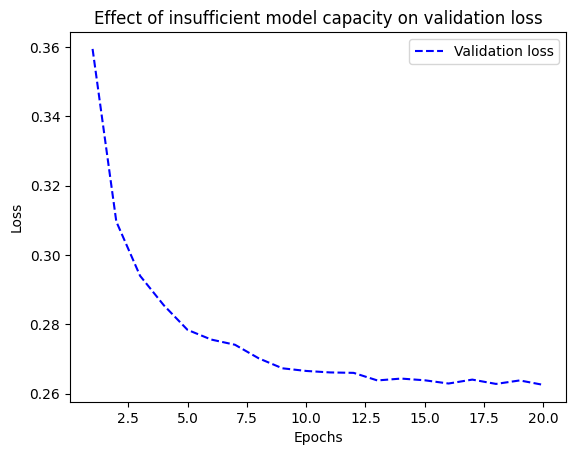

In [8]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [9]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 4ms/step - loss: 0.3578 - accuracy: 0.8988 - val_loss: 0.1894 - val_accuracy: 0.9450
Epoch 2/20
375/375 [==============================] - 1s 4ms/step - loss: 0.1549 - accuracy: 0.9535 - val_loss: 0.1448 - val_accuracy: 0.9579
Epoch 3/20
375/375 [==============================] - 1s 4ms/step - loss: 0.1079 - accuracy: 0.9686 - val_loss: 0.1064 - val_accuracy: 0.9697
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0810 - accuracy: 0.9758 - val_loss: 0.0948 - val_accuracy: 0.9712
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0650 - accuracy: 0.9805 - val_loss: 0.1031 - val_accuracy: 0.9675
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0523 - accuracy: 0.9842 - val_loss: 0.0997 - val_accuracy: 0.9719
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0438 - accuracy: 0.9869 - val_loss: 0.0908 - val_accuracy: 0.9751
Epoch 

## Improving generalization

### Dataset curation

### Feature engineering

### Using early stopping

### Regularizing your model

#### Reducing the network's size

**Original model**

In [10]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 34ms/step - loss: 0.5329 - accuracy: 0.7880 - val_loss: 0.4140 - val_accuracy: 0.8644
Epoch 2/20
30/30 [==============================] - 1s 17ms/step - loss: 0.3370 - accuracy: 0.8884 - val_loss: 0.3253 - val_accuracy: 0.8800
Epoch 3/20
30/30 [==============================] - 1s 18ms/step - loss: 0.2534 - accuracy: 0.9152 - val_loss: 0.2971 - val_accuracy: 0.8832
Epoch 4/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2048 - accuracy: 0.9313 - val_loss: 0.2759 - val_accuracy: 0.8900
Epoch 5/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1681 - accuracy: 0.9445 - val_loss: 0.2862 - val_accuracy: 0.8832
Epoch 6/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1458 - accuracy: 0.9529 - val_loss: 0.2849 - val_accuracy: 0.8863
Epoch 7/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1241 - accuracy: 0.9619 - val_loss: 0.2984 - val_accuracy: 0.8860
Epoch 8/20
30

**Version of the model with lower capacity**

In [11]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 34ms/step - loss: 0.6169 - accuracy: 0.6533 - val_loss: 0.5570 - val_accuracy: 0.7344
Epoch 2/20
30/30 [==============================] - 0s 15ms/step - loss: 0.5198 - accuracy: 0.7984 - val_loss: 0.5133 - val_accuracy: 0.7722
Epoch 3/20
30/30 [==============================] - 0s 14ms/step - loss: 0.4712 - accuracy: 0.8570 - val_loss: 0.4834 - val_accuracy: 0.8614
Epoch 4/20
30/30 [==============================] - 0s 14ms/step - loss: 0.4372 - accuracy: 0.8959 - val_loss: 0.4922 - val_accuracy: 0.7987
Epoch 5/20
30/30 [==============================] - 0s 14ms/step - loss: 0.4119 - accuracy: 0.9155 - val_loss: 0.4587 - val_accuracy: 0.8575
Epoch 6/20
30/30 [==============================] - 0s 15ms/step - loss: 0.3900 - accuracy: 0.9332 - val_loss: 0.4573 - val_accuracy: 0.8572
Epoch 7/20
30/30 [==============================] - 1s 17ms/step - loss: 0.3718 - accuracy: 0.9462 - val_loss: 0.4421 - val_accuracy: 0.8816
Epoch 8/20
30

**Version of the model with higher capacity**

In [12]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 4s 125ms/step - loss: 0.5726 - accuracy: 0.7139 - val_loss: 0.3813 - val_accuracy: 0.8542
Epoch 2/20
30/30 [==============================] - 3s 116ms/step - loss: 0.3315 - accuracy: 0.8689 - val_loss: 0.2893 - val_accuracy: 0.8825
Epoch 3/20
30/30 [==============================] - 3s 117ms/step - loss: 0.2331 - accuracy: 0.9096 - val_loss: 0.2695 - val_accuracy: 0.8888
Epoch 4/20
30/30 [==============================] - 3s 113ms/step - loss: 0.1961 - accuracy: 0.9263 - val_loss: 0.3036 - val_accuracy: 0.8734
Epoch 5/20
30/30 [==============================] - 3s 111ms/step - loss: 0.1414 - accuracy: 0.9497 - val_loss: 0.3188 - val_accuracy: 0.8767
Epoch 6/20
30/30 [==============================] - 3s 111ms/step - loss: 0.1023 - accuracy: 0.9648 - val_loss: 0.4960 - val_accuracy: 0.8257
Epoch 7/20
30/30 [==============================] - 3s 110ms/step - loss: 0.0868 - accuracy: 0.9716 - val_loss: 0.3470 - val_accuracy: 0.8828
Epoch 

#### Adding weight regularization

**Adding L2 weight regularization to the model**

In [13]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 32ms/step - loss: 0.6108 - accuracy: 0.7624 - val_loss: 0.4655 - val_accuracy: 0.8722
Epoch 2/20
30/30 [==============================] - 1s 18ms/step - loss: 0.3995 - accuracy: 0.8974 - val_loss: 0.4381 - val_accuracy: 0.8492
Epoch 3/20
30/30 [==============================] - 0s 16ms/step - loss: 0.3289 - accuracy: 0.9176 - val_loss: 0.3599 - val_accuracy: 0.8937
Epoch 4/20
30/30 [==============================] - 1s 18ms/step - loss: 0.2911 - accuracy: 0.9279 - val_loss: 0.3521 - val_accuracy: 0.8923
Epoch 5/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2693 - accuracy: 0.9361 - val_loss: 0.3551 - val_accuracy: 0.8885
Epoch 6/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2526 - accuracy: 0.9408 - val_loss: 0.3736 - val_accuracy: 0.8808
Epoch 7/20
30/30 [==============================] - 1s 17ms/step - loss: 0.2406 - accuracy: 0.9454 - val_loss: 0.3665 - val_accuracy: 0.8845
Epoch 8/20
30

**Different weight regularizers available in Keras**

In [14]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

#### Adding dropout

**Adding dropout to the IMDB model**

In [15]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 30ms/step - loss: 0.6532 - accuracy: 0.6197 - val_loss: 0.5554 - val_accuracy: 0.8385
Epoch 2/20
30/30 [==============================] - 1s 19ms/step - loss: 0.5328 - accuracy: 0.7589 - val_loss: 0.4342 - val_accuracy: 0.8607
Epoch 3/20
30/30 [==============================] - 1s 20ms/step - loss: 0.4413 - accuracy: 0.8217 - val_loss: 0.3589 - val_accuracy: 0.8788
Epoch 4/20
30/30 [==============================] - 1s 20ms/step - loss: 0.3808 - accuracy: 0.8589 - val_loss: 0.3218 - val_accuracy: 0.8832
Epoch 5/20
30/30 [==============================] - 0s 16ms/step - loss: 0.3295 - accuracy: 0.8818 - val_loss: 0.2890 - val_accuracy: 0.8906
Epoch 6/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2856 - accuracy: 0.9037 - val_loss: 0.2792 - val_accuracy: 0.8915
Epoch 7/20
30/30 [==============================] - 0s 17ms/step - loss: 0.2562 - accuracy: 0.9187 - val_loss: 0.2783 - val_accuracy: 0.8914
Epoch 8/20
30

## Summary